In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [114]:
data= pd.read_csv('Titanic-Dataset.csv')

In [115]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
data.shape

(891, 12)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [121]:
data.duplicated().sum()

0

In [122]:
df=pd.get_dummies(data['Sex'],drop_first=True)
df=df.astype('int64')
df

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [123]:
data=pd.concat([df,data],axis=1)
data

,male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,0,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [124]:
data.drop('Sex',axis=1,inplace = True )

In [125]:
data=data.rename(columns={'male':'gender'}) # rename cloumn male by gender
data

,gender,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [126]:
data.drop(['PassengerId','Name','Ticket'],axis =1 , inplace=True )

In [127]:
data.to_csv('data.csv', index=False)

<Axes: >

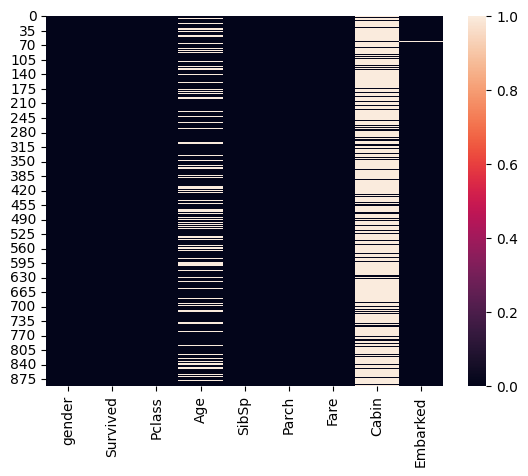

In [128]:
sns.heatmap(data.isnull())

In [129]:
d_null=data.isnull().sum()
d_null[d_null>0]

,0
Age,177
Cabin,687
Embarked,2


In [130]:
d_null=data.isnull().sum()
d_null[d_null>0]/data.shape[0]*100

,0
Age,19.865320
Cabin,77.104377
Embarked,0.224467


Text(0.5, 1.0, 'Age Distribution')

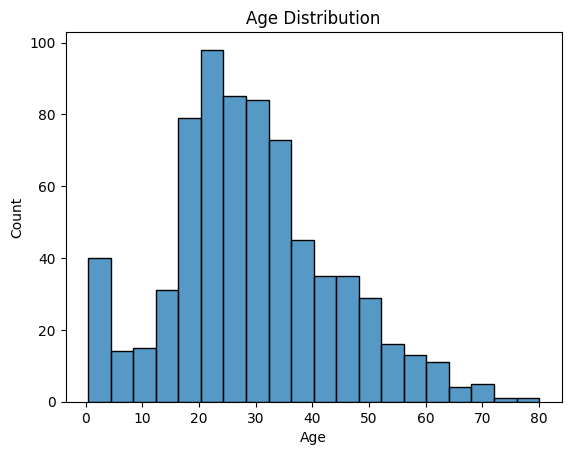

In [131]:
sns.histplot(data.Age)
plt.title('Age Distribution')

In [132]:
data.Age.mean()

29.69911764705882

In [133]:
data.Age.median()

28.0

In [134]:
data.Age.mode()

,Age
0,24.0


In [135]:
# fill missing values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

<ipython-input-135-a7a43052e4d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [136]:
data.Age.isna().sum()

0

In [137]:
data.Cabin.isnull().sum()/data.shape[0]*100

77.10437710437711

In [138]:
data.drop(columns='Cabin',inplace=True)

In [139]:
data.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [140]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-140-e67f7aa8e8b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [141]:
data.isna().sum()

,0
gender,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Text(0.5, 1.0, 'Check Missing data')

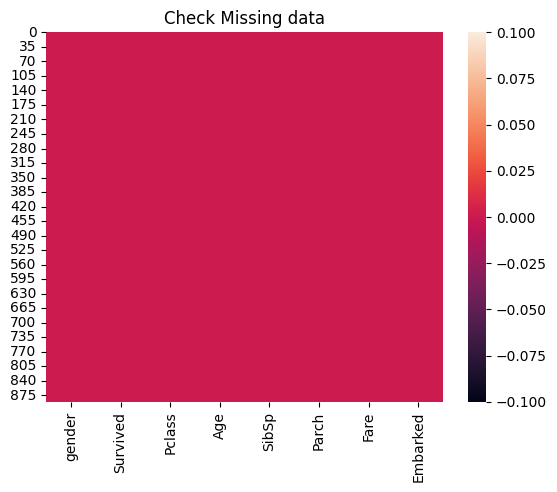

In [142]:
sns.heatmap(data.isnull())
plt.title('Check Missing data')

In [143]:
data.drop(columns=['Embarked'],inplace=True)

In [144]:
data1=pd.read_csv('data.csv')
slicing_0=data1.iloc[:7,:4]
slicing_0

,gender,Survived,Pclass,Age
0,1,0,3,22.0
1,0,1,1,38.0
2,0,1,3,26.0
3,0,1,1,35.0
4,1,0,3,35.0
5,1,0,3,NaN
6,1,0,1,54.0


In [145]:
slicing_0.Age.fillna(method='ffill')

<ipython-input-145-2e0a645a26ef>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  slicing_0.Age.fillna(method='ffill')


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,35.0
6,54.0


In [146]:
slicing_0.Age.fillna(method='bfill')

<ipython-input-146-c57e55ec1cee>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  slicing_0.Age.fillna(method='bfill')


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,54.0
6,54.0


In [147]:
data2=pd.read_csv('data.csv')
data2.drop(columns=['Embarked','Cabin'],inplace=True)
slicing_1=data1.iloc[:6,:4]
slicing_1

,gender,Survived,Pclass,Age
0,1,0,3,22.0
1,0,1,1,38.0
2,0,1,3,26.0
3,0,1,1,35.0
4,1,0,3,35.0
5,1,0,3,NaN


In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(slicing_1) # Fit the imputer and transform the data

In [149]:
simple_imputed_data2 = imputer.fit_transform(data2) # Fit the imputer and transform the data
data_SimpleImputer = pd.DataFrame(simple_imputed_data2, columns=data2.columns)
data_SimpleImputer

,gender,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,0.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,1.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,1.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,0.0,3.0,29.699118,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000


In [150]:
data3=data2.copy()
slicing_2=data2.iloc[:6,:4]
slicing_2

,gender,Survived,Pclass,Age
0,1,0,3,22.0
1,0,1,1,38.0
2,0,1,3,26.0
3,0,1,1,35.0
4,1,0,3,35.0
5,1,0,3,NaN


In [151]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Create an Iterative Imputer instance
iterative_imputer = IterativeImputer()

#Impute missing values
imputed_data = iterative_imputer.fit_transform(slicing_2)

#Convert the result back to a DataFrame
imputed_data2 = pd.DataFrame(imputed_data, columns=slicing_2.columns)
imputed_data2

,gender,Survived,Pclass,Age
0,1.0,0.0,3.0,22.000000
1,0.0,1.0,1.0,38.000000
2,0.0,1.0,3.0,26.000000
3,0.0,1.0,1.0,35.000000
4,1.0,0.0,3.0,35.000000
5,1.0,0.0,3.0,29.028825


In [152]:

#Impute missing values
imputed_data = iterative_imputer.fit_transform(data2)

#Convert the result back to a DataFrame
data_IterativeImputer = pd.DataFrame(imputed_data, columns=data2.columns)
data_IterativeImputer

,gender,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,0.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,1.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,1.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,0.0,3.0,23.274703,1.0,2.0,23.4500
889,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000


In [153]:
data3=data1.copy()
slicing=data3.iloc[:6,:4]
slicing

,gender,Survived,Pclass,Age
0,1,0,3,22.0
1,0,1,1,38.0
2,0,1,3,26.0
3,0,1,1,35.0
4,1,0,3,35.0
5,1,0,3,NaN


In [154]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

#Impute missing values
imputed_data = knn_imputer.fit_transform(slicing)

#Convert the result back to a DataFrame
Knn_imputed_data3 = pd.DataFrame(imputed_data, columns=slicing.columns)
Knn_imputed_data3

,gender,Survived,Pclass,Age
0,1.0,0.0,3.0,22.0
1,0.0,1.0,1.0,38.0
2,0.0,1.0,3.0,26.0
3,0.0,1.0,1.0,35.0
4,1.0,0.0,3.0,35.0
5,1.0,0.0,3.0,28.5


In [155]:
data.isna().sum()

,0
gender,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0


In [156]:
data

,gender,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,0,1,1,38.0,1,0,71.2833
2,0,1,3,26.0,0,0,7.9250
3,0,1,1,35.0,1,0,53.1000
4,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,1,0,2,27.0,0,0,13.0000
887,0,1,1,19.0,0,0,30.0000
888,0,0,3,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , r2_score

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [165]:

X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [178]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(random_state=42)
LRmodel.fit(X_train, y_train)


LR_pred = LRmodel.predict(X_test)


In [179]:
accuracy_score(y_test, LR_pred)
confusion_matrix(y_test, LR_pred)
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Confusion Matrix:
[[90 15]
 [21 53]]


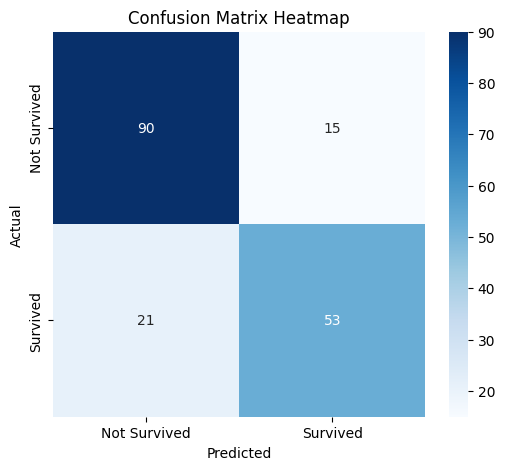

In [180]:
conf_matrix = confusion_matrix(y_test, LR_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [181]:
r2 = r2_score(y_test, LR_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.17065637065637063


In [182]:
import xgboost as xgb

XGBmodel = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
XGBmodel.fit(X_train, y_train)
xgb_pred = XGBmodel.predict(X_test)
accuracy_score(y_test, xgb_pred )
confusion_matrix(y_test, xgb_pred )
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [183]:
r2 = r2_score(y_test, xgb_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.23976833976833978


In [184]:
from sklearn.svm import SVC

SVCmodel = SVC(kernel='linear', random_state=42)
SVCmodel.fit(X_train, y_train)
svc_pred = SVCmodel.predict(X_test)
accuracy_score(y_test, svc_pred)
confusion_matrix(y_test, svc_pred)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [185]:
r2 = r2_score(y_test, svc_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.10154440154440147


In [186]:
from sklearn.neighbors import KNeighborsClassifier

KNmodel = KNeighborsClassifier(n_neighbors=5)
KNmodel.fit(X_train, y_train)
kn_pred = KNmodel.predict(X_test)
accuracy_score(y_test, kn_pred)
confusion_matrix(y_test, kn_pred)
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [187]:
from sklearn.naive_bayes import GaussianNB

GBmodel = GaussianNB()
GBmodel.fit(X_train, y_train)
gb_pred = GBmodel.predict(X_test)
accuracy_score(y_test, gb_pred)
confusion_matrix(y_test, gb_pred)
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [188]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5807 - loss: 0.6760
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.5233  
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 0.4857
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8073 - loss: 0.4435
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8130 - loss: 0.4326
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 0.4163
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8353 - loss: 0.3926
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8305 - loss: 0.3975 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.4108 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4346 


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [189]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]


<Axes: >

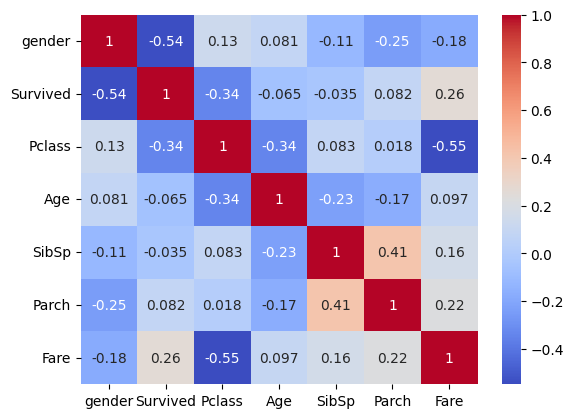

In [190]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [191]:
data

,gender,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,0,1,1,38.0,1,0,71.2833
2,0,1,3,26.0,0,0,7.9250
3,0,1,1,35.0,1,0,53.1000
4,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,1,0,2,27.0,0,0,13.0000
887,0,1,1,19.0,0,0,30.0000
888,0,0,3,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


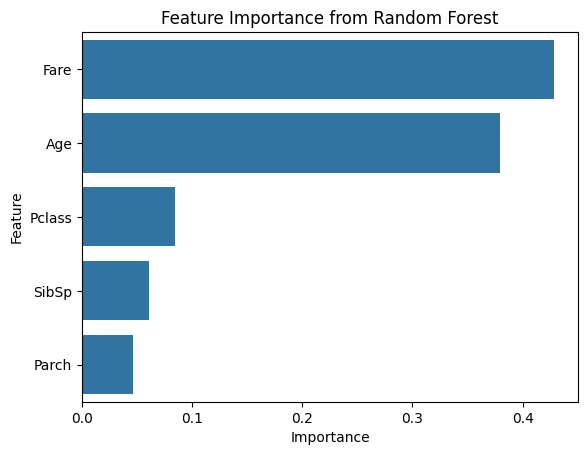

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare data (drop non-numeric and missing values)
df = data[['Survived', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch']].dropna()

X = df.drop(columns=['Survived'])
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance from Random Forest")
plt.show()

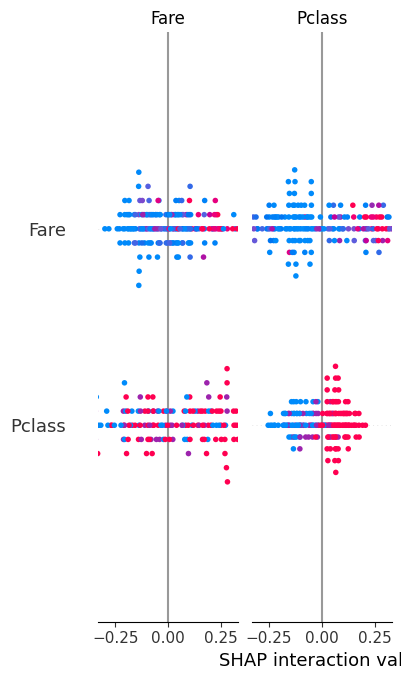

In [198]:
import shap

shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="scatter")


